#### Imports

In [1]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd

import os
from pprint import pprint 
import time
import json

import acquire

In [2]:
#standard imports
import numpy as np

#import
import unicodedata
#import regular expression operations
import re
#import natural language toolkit
import nltk
#import stopwords list
from nltk.corpus import stopwords


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from wordcloud import WordCloud

#### Acquire

In [11]:
url = 'https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=1'

response = get(url)
response

<Response [200]>

In [12]:
soup = BeautifulSoup(response.content, 'html.parser')
soup


<!DOCTYPE html>

<html data-a11y-animated-images="system" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-4569ff6a5326.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-34efc528590d.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/assets/dark_dimmed-b94a34c1d526.c

In [13]:
repos = soup.find_all('a', class_="v-align-middle")
repos

[<a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"sports betting","result_position":1,"click_id":224907324,"result":{"id":224907324,"global_relay_id":"MDEwOlJlcG9zaXRvcnkyMjQ5MDczMjQ=","model_name":"Repository","url":"https://github.com/kyleskom/NBA-Machine-Learning-Sports-Betting"},"originating_url":"https://github.com/search?o=desc&amp;q=sports+betting&amp;s=stars&amp;type=Repositories&amp;p=1","user_id":null}}' data-hydro-click-hmac="911ebb6d239c8452fd3115dcc4122510305394d7e2b3390dc1595bbd6a91c379" href="/kyleskom/NBA-Machine-Learning-Sports-Betting">kyleskom/NBA-Machine-Learning-<em>Sports</em>-<em>Betting</em></a>,
 <a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"sports betting","result_position":2,"click_id":177790720,"result":{"id":177790720,"global_relay_id":"MDEwOlJlcG9zaXRvcnkxNzc3OTA3MjA=","model_name":"Repository"

In [14]:
# extract the links into a list
link_list = [link['href'] for link in repos]
link_list

['/kyleskom/NBA-Machine-Learning-Sports-Betting',
 '/pretrehr/Sports-betting',
 '/llSourcell/ChatGPT_Sports_Betting_Bot',
 '/georgedouzas/sports-betting',
 '/sedemmler/WagerBrain',
 '/openbookie/sportbook',
 '/Seb943/scrapeOP',
 '/cvidan/bet365-scraper',
 '/llSourcell/sports_betting_with_reinforcement_learning',
 '/jd5688/online-sports-betting']

In [15]:
['https://github.com'+link['href'] for link in repos]

['https://github.com/kyleskom/NBA-Machine-Learning-Sports-Betting',
 'https://github.com/pretrehr/Sports-betting',
 'https://github.com/llSourcell/ChatGPT_Sports_Betting_Bot',
 'https://github.com/georgedouzas/sports-betting',
 'https://github.com/sedemmler/WagerBrain',
 'https://github.com/openbookie/sportbook',
 'https://github.com/Seb943/scrapeOP',
 'https://github.com/cvidan/bet365-scraper',
 'https://github.com/llSourcell/sports_betting_with_reinforcement_learning',
 'https://github.com/jd5688/online-sports-betting']

In [2]:
url = 'https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p='

In [20]:
link_list = []

for x in range(1,13):
    # print(x)
    print(url+str(x))
    response = get(url+str(x))
    soup = BeautifulSoup(response.content, 'html.parser')
    repos = soup.find_all('a', class_="v-align-middle")
    # print(repos)
    time.sleep(10)
    print(len(repos))
    link_list.extend([link['href'] for link in repos])

https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=1
10
https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=2
10
https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=3
10
https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=4
10
https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=5
10
https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=6
10
https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=7
10
https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=8
10
https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=9
10
https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=10
10
https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=11
0
https://github.com/search?o=desc&q=sports+betting&s=stars&type=Repositories&p=12
0


In [22]:
len(link_list)

100

In [5]:
data = acquire.scrape_github_data()

In [7]:
json.dump(data, open("data.json", "w"), indent=1)

In [8]:
df = pd.DataFrame(data)

In [9]:
df.head()

,repo,language,readme_contents
0,/kyleskom/NBA-Machine-Learning-Sports-Betting,Python,# NBA Sports Betting Using Machine Learning 🏀\...
1,/pretrehr/Sports-betting,Python,[![forthebadge made-with-python](http://ForThe...
2,/llSourcell/ChatGPT_Sports_Betting_Bot,Jupyter Notebook,# ChatGPT Sports Betting Bot\n\nThis is the co...
3,/georgedouzas/sports-betting,Python,[scikit-learn]: <http://scikit-learn.org/stabl...
4,/sedemmler/WagerBrain,Python,# WagerBrain\nA package containing the essenti...


In [12]:
df.readme_contents = df.readme_contents.str.replace('-',' ')

In [13]:
df.head()

,repo,language,readme_contents
0,/kyleskom/NBA-Machine-Learning-Sports-Betting,Python,# NBA Sports Betting Using Machine Learning 🏀\...
1,/pretrehr/Sports-betting,Python,[![forthebadge made with python](http://ForThe...
2,/llSourcell/ChatGPT_Sports_Betting_Bot,Jupyter Notebook,# ChatGPT Sports Betting Bot\n\nThis is the co...
3,/georgedouzas/sports-betting,Python,[scikit learn]: <http://scikit learn.org/stabl...
4,/sedemmler/WagerBrain,Python,# WagerBrain\nA package containing the essenti...


In [16]:
def basic_clean(original):
    '''
    Input: original text or .apply(basic_clean) to entire data frame
    Actions: 
    lowercase everything,
    normalizes everything,
    removes anything that's not a letter, number, whitespace, or single quote
    Output: Cleaned text
    '''
    # lowercase everything
    basic_cleaned = original.lower()
    # normalize unicode characters
    basic_cleaned = unicodedata.normalize('NFKD', basic_cleaned)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')
    # Replace anything that is not a letter, number, whitespace or a single quote.
    basic_cleaned = re.sub(r'[^a-z0-9\'\s]', '', basic_cleaned)
    
    return basic_cleaned

In [17]:
def tokenize(basic_cleaned):
    '''
    Input: basic_cleaned text string or .apply(tokenize) to entire data frame
    Actions:
    creates the tokenizer
    uses the tokenizer
    Output: clean_tokenize text string
    '''
    #create the tokenizer
    tokenize = nltk.tokenize.ToktokTokenizer()
    #use the tokenizer
    clean_tokenize = tokenize.tokenize(basic_cleaned, return_str=True)
    
    return clean_tokenize


In [18]:
def remove_stopwords(lemma_or_stem, extra_words=[], exclude_words=[]):
    '''
    Input:text string or .apply(remove_stopwords) to entire data frame
    Action: removes standard stop words
    Output: parsed_article
    '''
    # save stopwords
    stopwords_ls = stopwords.words('english')
    # removing any stopwords in exclude list
    stopwords_ls = set(stopwords_ls) - set(exclude_words)
    # adding any stopwords in extra list
    stopwords_ls = stopwords_ls.union(set(extra_words))
    
    # split words in article
    words = lemma_or_stem.split()
    # remove stopwords from list of words
    filtered = [word for word in words if word not in stopwords_ls]
    # join words back together
    parsed_article = ' '.join(filtered)
    
    return parsed_article


In [19]:
def lemmatize(clean_tokenize):
    '''
    Inputs: clean_tokenize
    Actions: creates lemmatizer and applies to each word
    Outputs: clean_tokenize_lemma
    '''
    #create the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    #use lemmatize - apply to each word in our string
    lemmas = [wnl.lemmatize(word) for word in clean_tokenize.split()]
    #join words back together
    clean_tokenize_lemma = ' '.join(lemmas)
    
    return clean_tokenize_lemma



In [20]:
def clean(text):
    '''
    A simple function to cleanup text data.
    
    Args:
        text (str): The text to be cleaned.
        
    Returns:
        list: A list of lemmatized words after cleaning.
    '''
    
    # basic_clean() function from last lesson:
    # Normalize text by removing diacritics, encoding to ASCII, decoding to UTF-8, and converting to lowercase
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    
    # Remove punctuation, split text into words
    words = re.sub(r'[^\w\s]', '', text).split()
    
    
    # lemmatize() function from last lesson:
    # Initialize WordNet lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Combine standard English stopwords with additional stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    
    # Lemmatize words and remove stopwords
    cleaned_words = [wnl.lemmatize(word) for word in words if word not in stopwords]
    
    return cleaned_words

In [14]:
df = df.rename(columns={'readme_contents': 'original'})

In [21]:
df['clean_norm_token'] = df.original.apply(tokenize).apply(basic_clean).apply(remove_stopwords)

In [22]:
df.head()

,repo,language,original,clean_norm_token
0,/kyleskom/NBA-Machine-Learning-Sports-Betting,Python,# NBA Sports Betting Using Machine Learning 🏀\...,nba sports betting using machine learning img ...
1,/pretrehr/Sports-betting,Python,[![forthebadge made with python](http://ForThe...,forthebadge made python httpforthebadgecomimag...
2,/llSourcell/ChatGPT_Sports_Betting_Bot,Jupyter Notebook,# ChatGPT Sports Betting Bot\n\nThis is the co...,chatgpt sports betting bot code chatgpt sports...
3,/georgedouzas/sports-betting,Python,[scikit learn]: <http://scikit learn.org/stabl...,scikit learn httpscikit learnorgstable black b...
4,/sedemmler/WagerBrain,Python,# WagerBrain\nA package containing the essenti...,wagerbrain package containing essential math t...


In [23]:
df['lemmatized'] = df.clean_norm_token.apply(lemmatize)

In [25]:
df.language.value_counts()

JavaScript           24
Python               23
Jupyter Notebook     10
HTML                  8
R                     8
TypeScript            6
Ruby                  5
PHP                   4
C#                    4
Solidity              2
Rust                  2
Visual Basic .NET     1
Go                    1
Swift                 1
Java                  1
Name: language, dtype: int64

In [26]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that

python_words = clean(' '.join(df[df.language=='Python']['clean_norm_token']))
java_script_words = clean(' '.join(df[df.language=='JavaScript']['clean_norm_token']))
jupyter_notebook_words = clean(' '.join(df[df.language=='Jupyter Notebook']['clean_norm_token']))
html_words = clean(' '.join(df[df.language=='HTML']['clean_norm_token']))
r_words = clean(' '.join(df[df.language=='R']['clean_norm_token']))
all_words = clean(' '.join(df['clean_norm_token']))

In [27]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present

python_freq = pd.Series(python_words).value_counts()
java_script_freq = pd.Series(java_script_words).value_counts()
jupyter_notebook_freq = pd.Series(jupyter_notebook_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
r_freq = pd.Series(r_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [28]:
# lets combine all 3 dfs horizontally
# fill any missing values with zero
# convert the resulting df to contain only integer values:

word_counts = pd.concat([python_freq, java_script_freq, jupyter_notebook_freq,
                        html_freq, r_freq, all_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['python', 'java_script', 'jupyter_notebook', 'html', 'r', 'all']

word_counts.head()

,python,java_script,jupyter_notebook,html,r,all
124,194,0,90,1,2,426
de,163,0,0,15,0,186
bet,101,102,21,8,19,315
sport,93,57,29,9,16,255
le,92,2,1,3,2,102


In [50]:
def make_ngrams(words, n):
    return pd.Series(nltk.ngrams(words, n)).value_counts().head(20)

In [ ]:
def plot_bigrams(words):
    word_data = {k[0] + ' ' + k[1]: v for k, v in words.to_dict().items()}
    
    word_img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_data)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(word_img)
    plt.axis('off')
    plt.show()

In [29]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [30]:
df.language.value_counts()

JavaScript           24
Python               23
Jupyter Notebook     10
HTML                  8
R                     8
TypeScript            6
Ruby                  5
PHP                   4
C#                    4
Solidity              2
Rust                  2
Visual Basic .NET     1
Go                    1
Swift                 1
Java                  1
Name: language, dtype: int64

<AxesSubplot:>

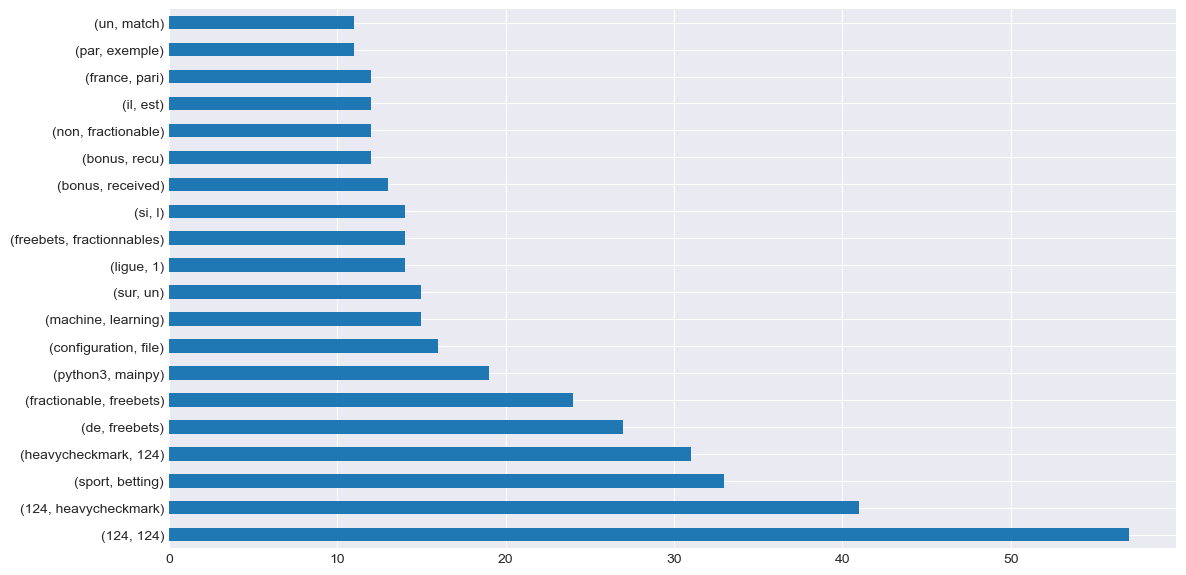

In [31]:
pd.Series(nltk.ngrams(python_words,2)).value_counts().head(20).plot.barh()

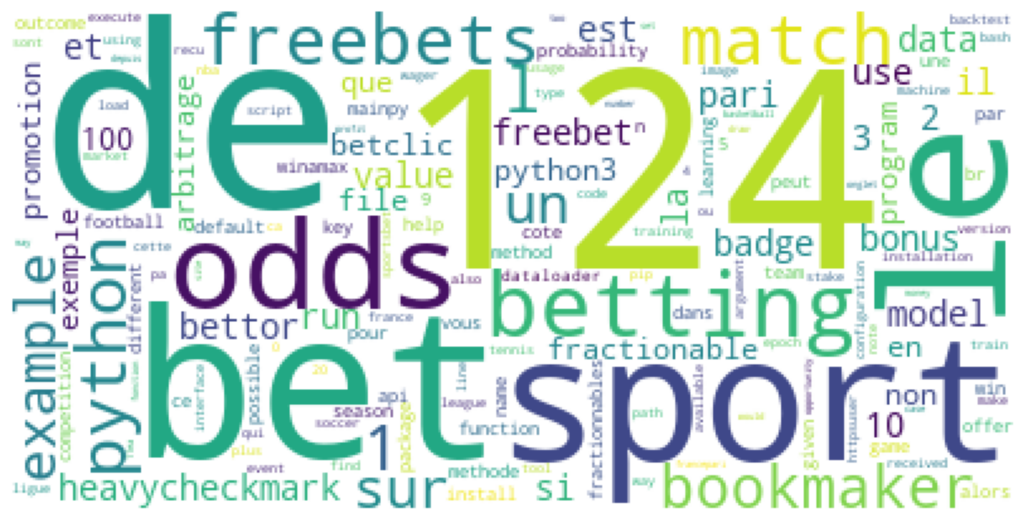

In [32]:
blog_img = WordCloud(background_color='white').generate_from_frequencies(python_freq)
plt.imshow(blog_img)
plt.axis('off')
plt.show()

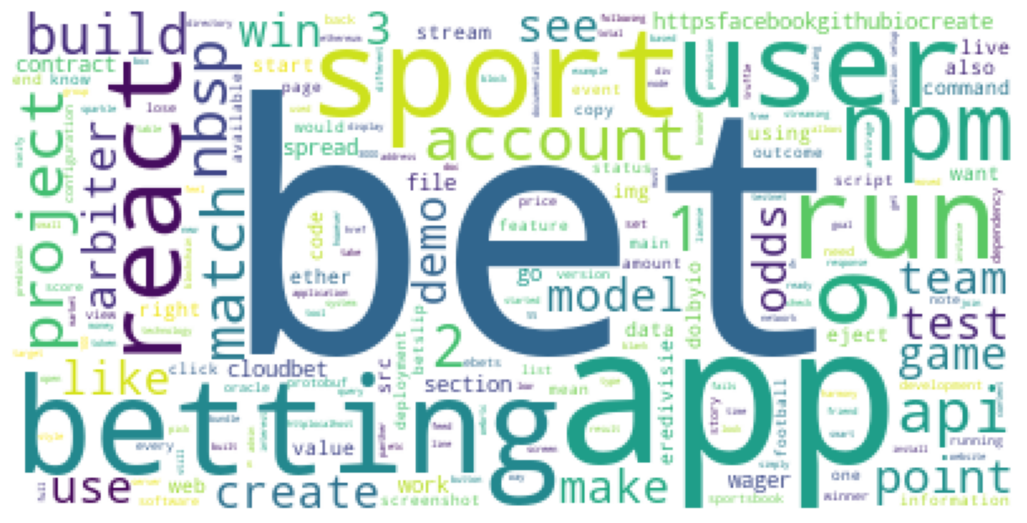

In [33]:
blog_img = WordCloud(background_color='white').generate_from_frequencies(java_script_freq)
plt.imshow(blog_img)
plt.axis('off')
plt.show()